In [1]:
import matplotlib.pyplot as plt
import iris
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa

import matplotlib.pyplot as plt

import pandas as pd
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import os
from datetime import datetime, timedelta, date

from matplotlib.patches import Rectangle

from igsmakerlib import map_maker

plt.rcParams['figure.figsize'] =(16,10) #format figure size 

In [2]:
date_needed = '2017-03-14'

year, month, day = date_needed.split('-')
year, month, day = int(year), int(month), int(day)
d0 = date(1977, 1, 1)
d1 = date(year, month, day)
delta = d1 - d0
if delta.days < 0:
    raise KeyboardInterrupt, 'date before start of data'
#         elif delta.days >= 0:
day = delta.days

In [3]:
day

14682

In [4]:
filename = os.path.join('working_data/vwind.IGS.77to17.nc')
fh = Dataset(filename)

lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
vwind = fh.variables['vwnd'][day] # day from 01-01-1977 
tmax_units = fh.variables['vwnd'].units

In [5]:
def plot_rec(bmap, lower_left, upper_left, lower_right, upper_right):
    xs = [lower_left[0], upper_left[0],
          lower_right[0], upper_right[0],
          lower_left[0], lower_right[0],
          upper_left[0], upper_right[0]]
    ys = [lower_left[1], upper_left[1],
          lower_right[1], upper_right[1],
          lower_left[1], lower_right[1],
          upper_left[1], upper_right[1]]
    bmap.plot(xs, ys, latlon = True, color='k', linewidth='.7')

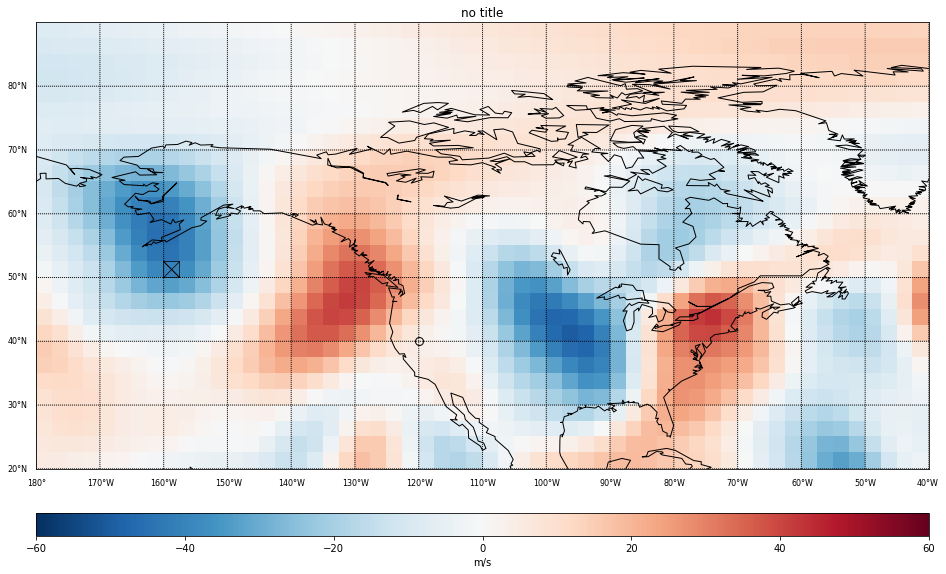

In [10]:

lon_0 = lons.mean()
lat_0 = lats.mean()

m=Basemap(projection='cyl', llcrnrlon=180, \
  urcrnrlon=320.,llcrnrlat=20,urcrnrlat=90, lat_ts=20, \
    resolution='c')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.pcolor(xi,yi,np.squeeze(vwind), cmap='RdBu_r', vmin=-60, vmax=60) # change vmax

llcrnrlon = 200
urcrnrlon = 202.5
llcrnrlat = 50
urcrnrlat = 52.5
lower_left = (llcrnrlon, llcrnrlat)
lower_right= (urcrnrlon, llcrnrlat)
upper_left = (llcrnrlon, urcrnrlat)
upper_right= (urcrnrlon, urcrnrlat)

plot_rec(m, lower_left, upper_left, lower_right, upper_right)

# add marker
lon = 240.0000
lat = 40.0000
x,y = m(lon, lat)
m.plot(x, y, 'o', markersize=8, markerfacecolor='none', markeredgecolor='black')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=8)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=8)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
# m.drawcountries()
# m.fillcontinents(color='coral',lake_color='aqua')

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tmax_units)

# ax = plt.gca() # get current axes instance
# get Texas and draw the filled polygon
# seg = ma
# poly = Polygon(seg, facecolor='red',edgecolor='red')
# ax.add_patch(poly)


# Add Title
plt.title('no title')

plt.show()

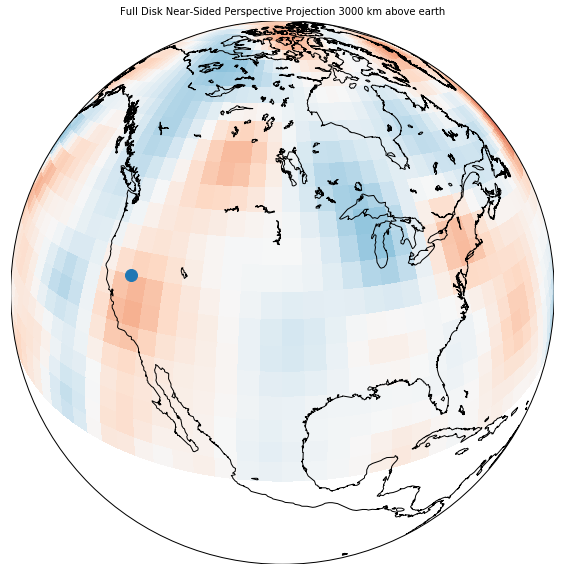

In [196]:
# lon_0, lat_0 are the center point of the projection.
# satellite_height is the altitude of the camera.
# resolution = 'l' means use low resolution coastlines.
h = 3000.
m = Basemap(projection='nsper',lon_0=-100,lat_0=40,
        satellite_height=h*1000.,resolution='l')

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.pcolor(xi,yi,np.squeeze(vwind), cmap='RdBu_r', vmin=-60, vmax=60) # change vmax

lon = 240.0000
lat = 40.0000
x,y = m(lon, lat)
m.plot(x, y, 'o', markersize=12)

m.drawcoastlines()
# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Near-Sided Perspective Projection %d km above earth" %
        h,fontsize=10)
plt.show()

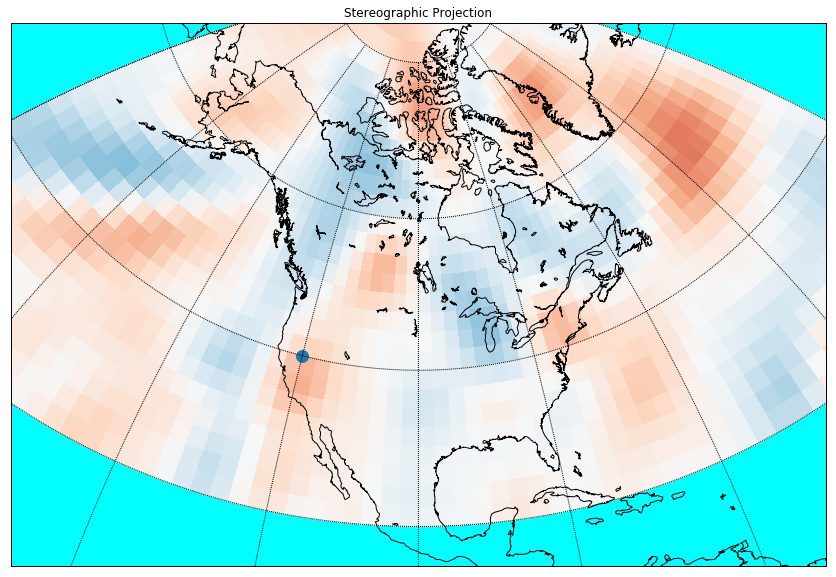

In [183]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# setup stereographic basemap.
# lat_ts is latitude of true scale.
# lon_0,lat_0 is central point.
m = Basemap(width=12000000,height=8000000,
            resolution='l',projection='stere',\
            lat_ts=50,lon_0=-100.,lat_0=50)
m.drawcoastlines()

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs = m.pcolor(xi,yi,np.squeeze(vwind), cmap='RdBu_r', vmin=-60, vmax=60) # change vmax

lon = 240.000
lat = 40.000
x,y = m(lon, lat)
m.plot(x, y, 'o', markersize=12)

# m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
# ax = plt.gca()
# for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
#     for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
#         lon, lat = m(x,y,inverse=True)
#         poly = m.tissot(lon,lat,1.5,100,\
#                         facecolor='green',zorder=10,alpha=0.5)
plt.title("Stereographic Projection")
plt.show()

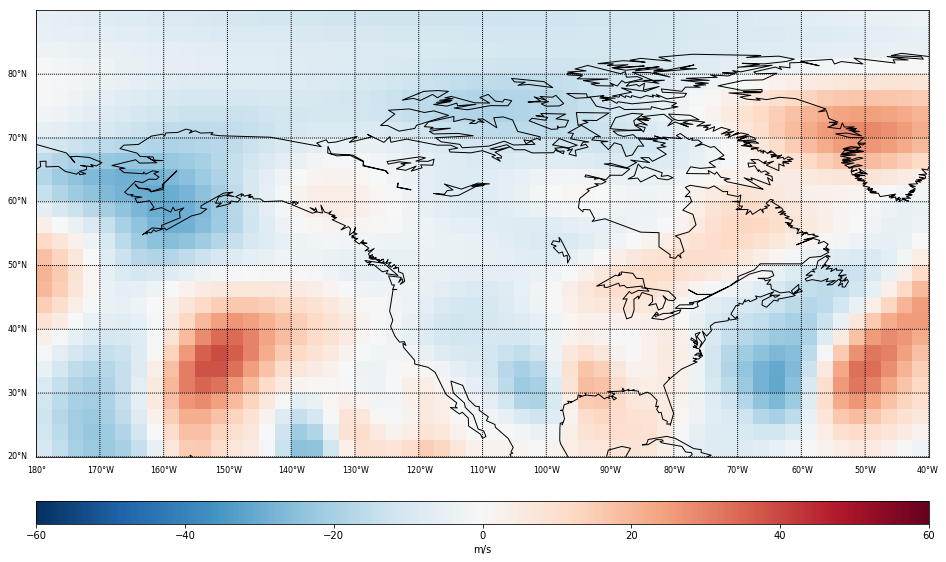

In [53]:
map_maker(data = 'v-wind', date_needed = '2007-03-14') # can change lat/lon and scale
plt.show()